In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_FRPS.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.668464,#VALUE!,#VALUE!,0.567248,0.506609,0.655030,0.636979,0.536181,0.506654,0.518761,0.496152,0.459147,0.449182,0.353947,0.357103,0.329711,0.304403,4
1,1997-02-28 00:00:00,0.624202,#VALUE!,#VALUE!,0.680081,0.668988,0.563555,0.562441,0.449556,0.436823,0.418170,0.399000,0.432388,0.428415,0.347527,0.347865,0.350774,0.343032,4
2,1997-03-31 00:00:00,0.636686,#VALUE!,#VALUE!,0.502622,0.568925,0.479497,0.450737,0.450872,0.413733,0.399141,0.374429,0.405359,0.388403,0.373381,0.367970,0.286711,0.279589,4
3,1997-04-30 00:00:00,0.671868,#VALUE!,#VALUE!,0.427443,0.382158,0.399787,0.374874,0.405612,0.390073,0.368219,0.351346,0.356374,0.340721,0.337753,0.348024,0.255888,0.283248,4
4,1997-05-31 00:00:00,0.653710,#VALUE!,#VALUE!,0.551612,0.482485,0.356650,0.347836,0.343839,0.322845,0.385693,0.368022,0.375736,0.351954,0.371183,0.374078,0.293054,0.312884,4


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.499596,0.486959,0.491705,0.485184,0.488772,0.494764,0.495848,0.487819,0.497761,0.473469,0.482113,0.462641,0.461482,2.55914
std,0.199647,0.233621,0.234617,0.232990,0.235452,0.231428,0.236072,0.225139,0.229379,0.231109,0.227496,0.227934,0.220252,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.371684,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.515250,0.514152,0.507158,0.507324,0.513215,0.510664,0.510860,0.502246,0.500336,0.479800,0.491677,0.482190,0.470409,3.00000
75%,0.623067,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               240 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 90th percentile (top 10%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 90th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.90) # every data point over the 90th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.7208965812999999


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.816948,0.433481,0.458078,0.493392,0.475499,0.575385,0.543136,0.574714,0.536217,0.563046,0.516295,0.555396,0.534963,3.041667
std,0.065619,0.326298,0.344768,0.334518,0.336206,0.312261,0.307929,0.305838,0.302246,0.279318,0.281473,0.213785,0.220722,0.806450
min,0.733154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.231935,0.280962,2.000000
25%,0.783657,0.148167,0.156691,0.191738,0.243306,0.408324,0.450634,0.402232,0.415444,0.409558,0.360323,0.427772,0.430334,2.000000
50%,0.808058,0.390537,0.433826,0.564516,0.486482,0.623468,0.521824,0.575279,0.503876,0.521501,0.440433,0.493675,0.457363,3.000000
75%,0.830189,0.673103,0.693374,0.656888,0.667201,0.690036,0.673873,0.724084,0.611818,0.648822,0.557218,0.528983,0.472125,4.000000
max,0.968081,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 3-mo (Treasury)  24.0  0.433481  0.326298  0.066605   
 2                         combined  48.0  0.625214  0.302909  0.043721   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.295697  0.571264  
 2   0.537259  0.713170  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.3835
 1                              Degrees of freedom =   46.0000
 2                                               t =    5.6443
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.6294
 7                                       Hedge's g =    1.6027
 8                        

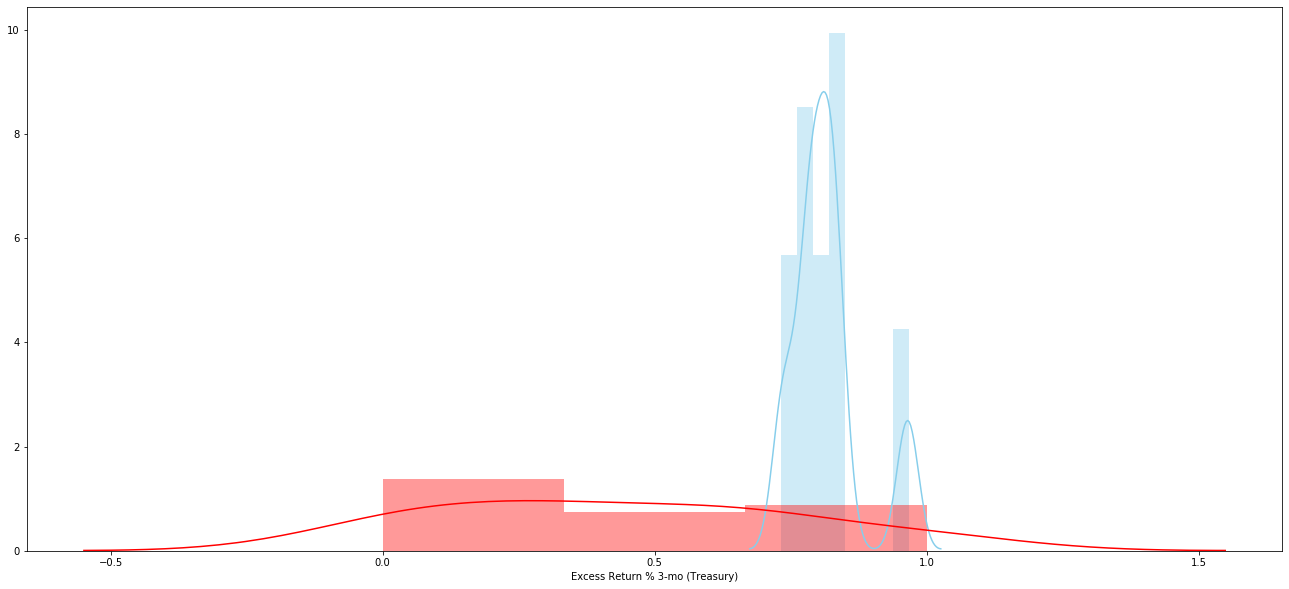

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  24.0  0.816948  0.065619  0.013394   0.789239   
 1  Excess Return % 3-mo (Agg)  24.0  0.458078  0.344768  0.070375   0.312495   
 2                    combined  48.0  0.637513  0.305216  0.044054   0.548887   
 
    Interval  
 0  0.844657  
 1  0.603661  
 2  0.726139  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.3589
 1                             Degrees of freedom =   46.0000
 2                                              t =    5.0094
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.4461
 7                                      Hedge's g =    1.4224
 8                                  Glass's delta =    

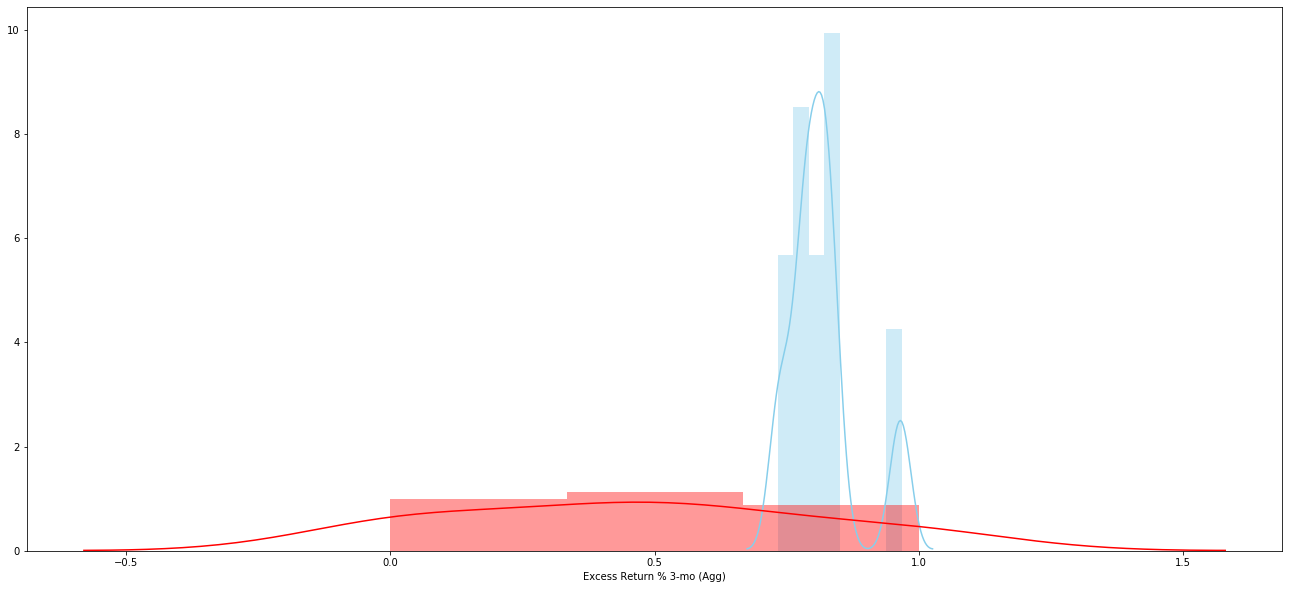

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 6-mo (Treasury)  24.0  0.493392  0.334518  0.068283   
 2                         combined  48.0  0.655170  0.289131  0.041733   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.352137  0.634646  
 2   0.571215  0.739125  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.3236
 1                              Degrees of freedom =   46.0000
 2                                               t =    4.6498
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.3423
 7                                       Hedge's g =    1.3203
 8                        

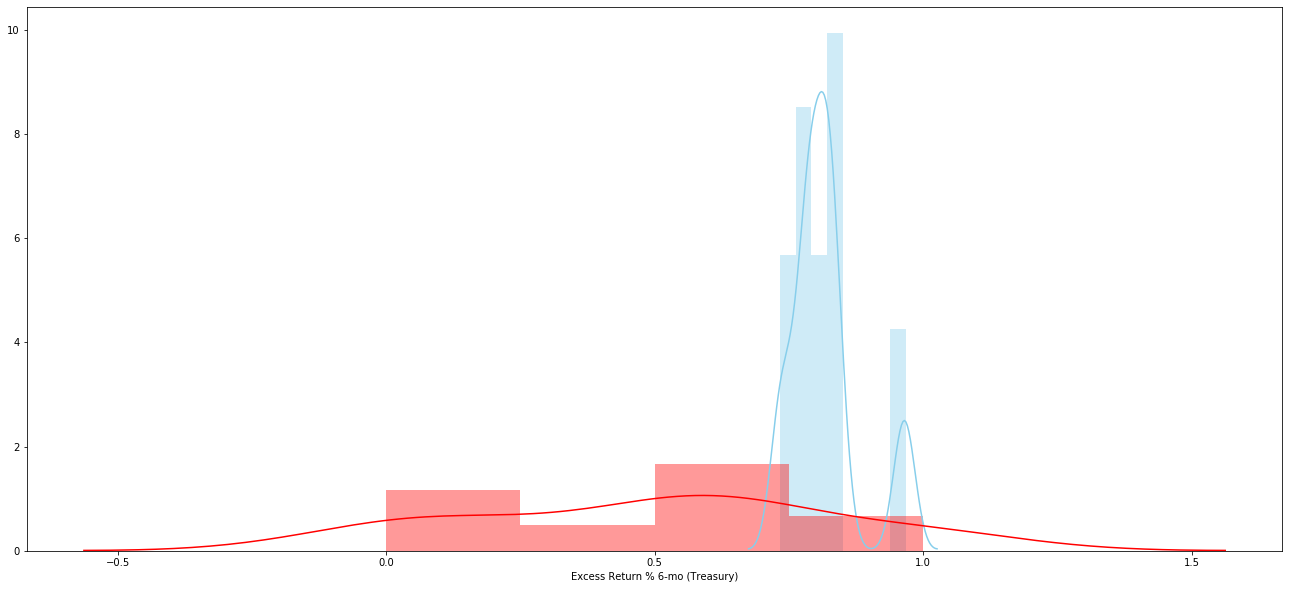

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  24.0  0.816948  0.065619  0.013394   0.789239   
 1  Excess Return % 6-mo (Agg)  24.0  0.475499  0.336206  0.068628   0.333531   
 2                    combined  48.0  0.646223  0.295278  0.042620   0.560484   
 
    Interval  
 0  0.844657  
 1  0.617466  
 2  0.731963  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.3414
 1                             Degrees of freedom =   46.0000
 2                                              t =    4.8832
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.4097
 7                                      Hedge's g =    1.3866
 8                                  Glass's delta =    

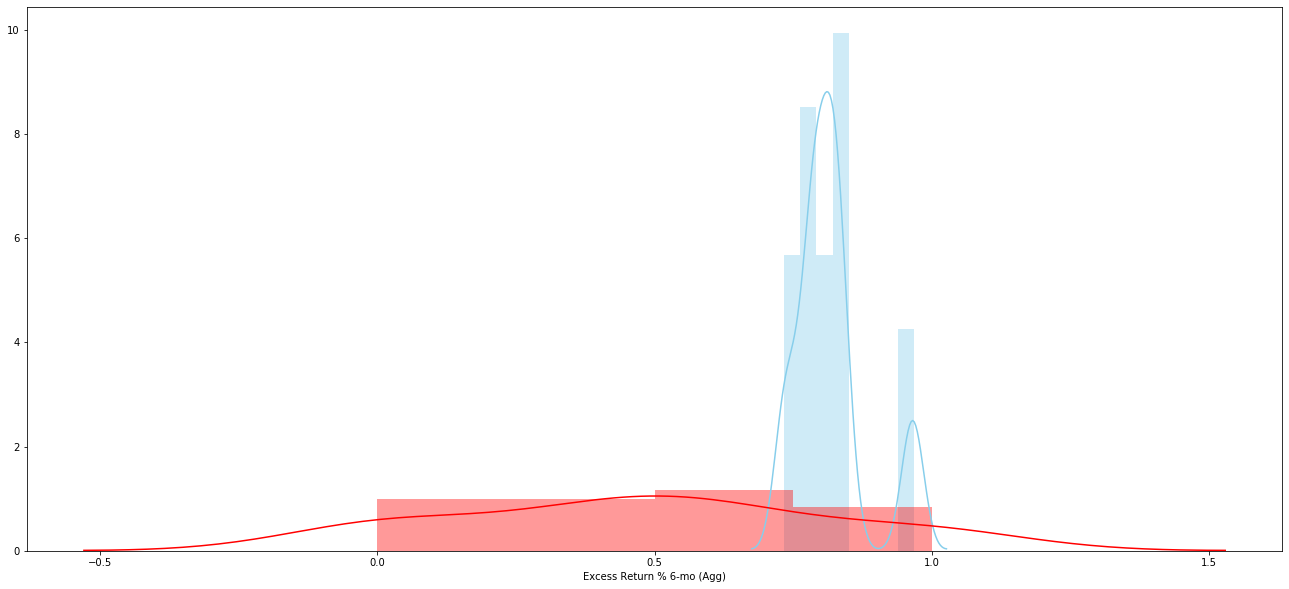

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 9-mo (Treasury)  24.0  0.575385  0.312261  0.063740   
 2                         combined  48.0  0.696167  0.254405  0.036720   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.443529  0.707241  
 2   0.622295  0.770038  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.2416
 1                              Degrees of freedom =   46.0000
 2                                               t =    3.7088
 3                           Two side test p value =    0.0006
 4                          Difference < 0 p value =    0.9997
 5                          Difference > 0 p value =    0.0003
 6                                       Cohen's d =    1.0706
 7                                       Hedge's g =    1.0531
 8                        

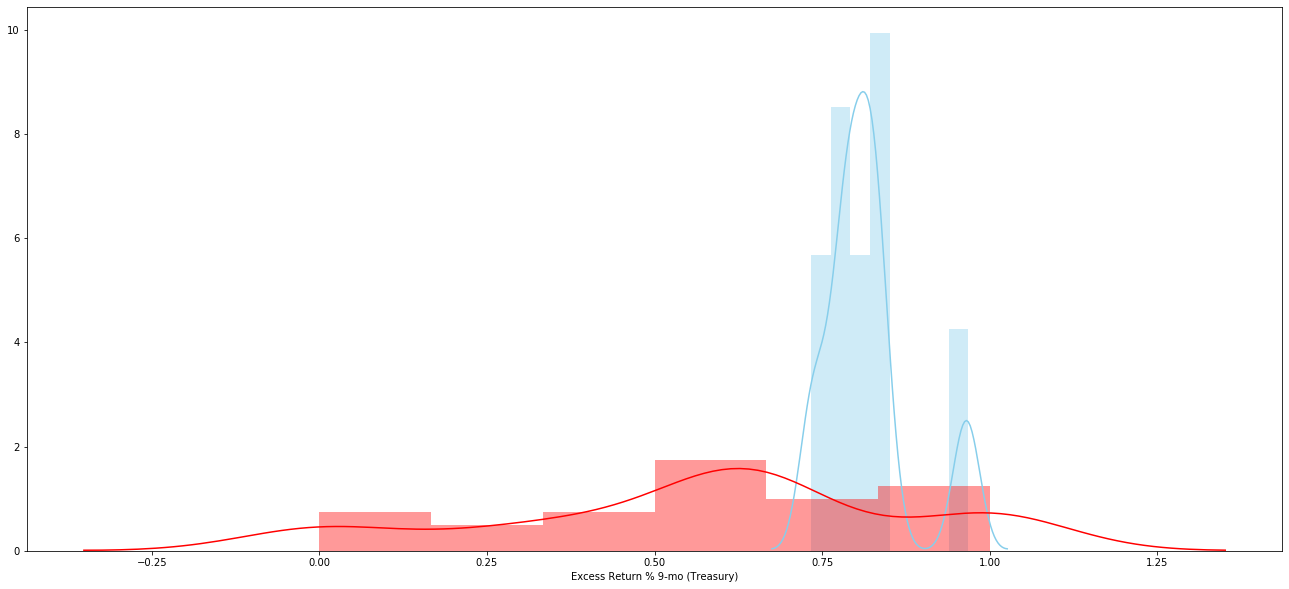

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  24.0  0.816948  0.065619  0.013394   0.789239   
 1  Excess Return % 9-mo (Agg)  24.0  0.543136  0.307929  0.062856   0.413109   
 2                    combined  48.0  0.680042  0.260097  0.037542   0.604518   
 
    Interval  
 0  0.844657  
 1  0.673163  
 2  0.755566  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.2738
 1                             Degrees of freedom =   46.0000
 2                                              t =    4.2605
 3                          Two side test p value =    0.0001
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.2299
 7                                      Hedge's g =    1.2097
 8                                  Glass's delta =    

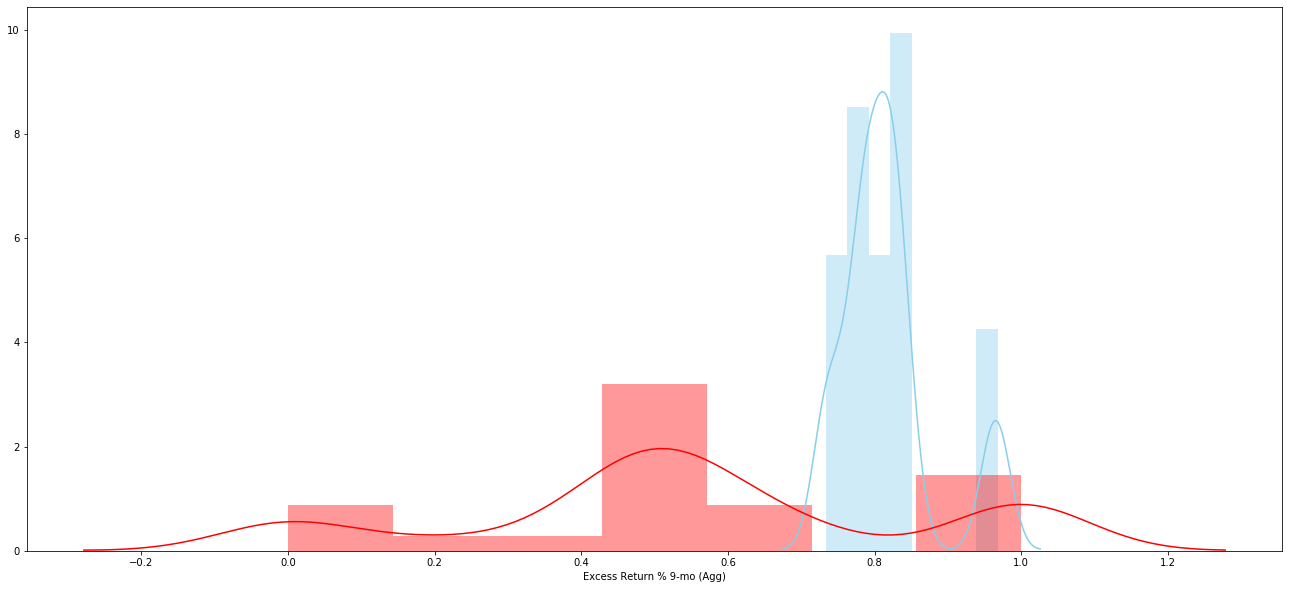

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 12-mo (Treasury)  24.0  0.574714  0.305838  0.062429   
 2                          combined  48.0  0.695831  0.250723  0.036189   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.445570  0.703858  
 2   0.623029  0.768633  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.2422
 1                              Degrees of freedom =   46.0000
 2                                               t =    3.7938
 3                           Two side test p value =    0.0004
 4                          Difference < 0 p value =    0.9998
 5                          Difference > 0 p value =    0.0002
 6                                       Cohen's d =    1.0952
 7                                       Hedge's g =    1.0772
 8                    

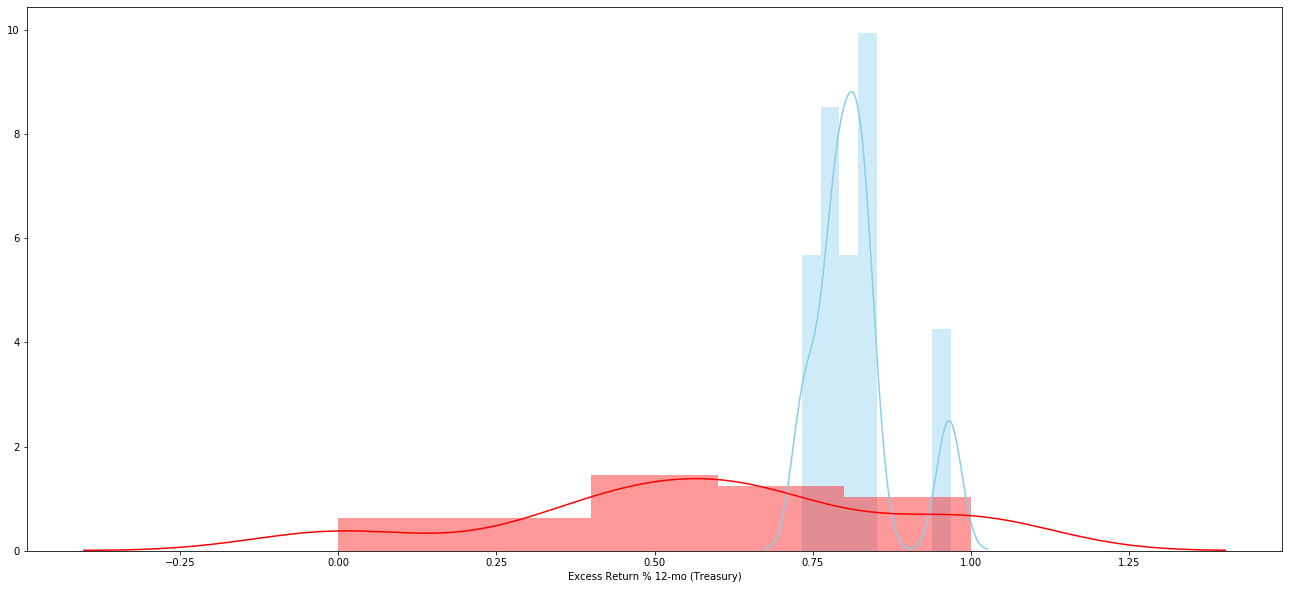

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  24.0  0.816948  0.065619  0.013394   0.789239   
 1  Excess Return % 12-mo (Agg)  24.0  0.536217  0.302246  0.061696   0.408589   
 2                     combined  48.0  0.676582  0.258715  0.037342   0.601459   
 
    Interval  
 0  0.844657  
 1  0.663844  
 2  0.751705  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.2807
 1                              Degrees of freedom =   46.0000
 2                                               t =    4.4467
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.2836
 7                                       Hedge's g =    1.2626
 8                                   Glass

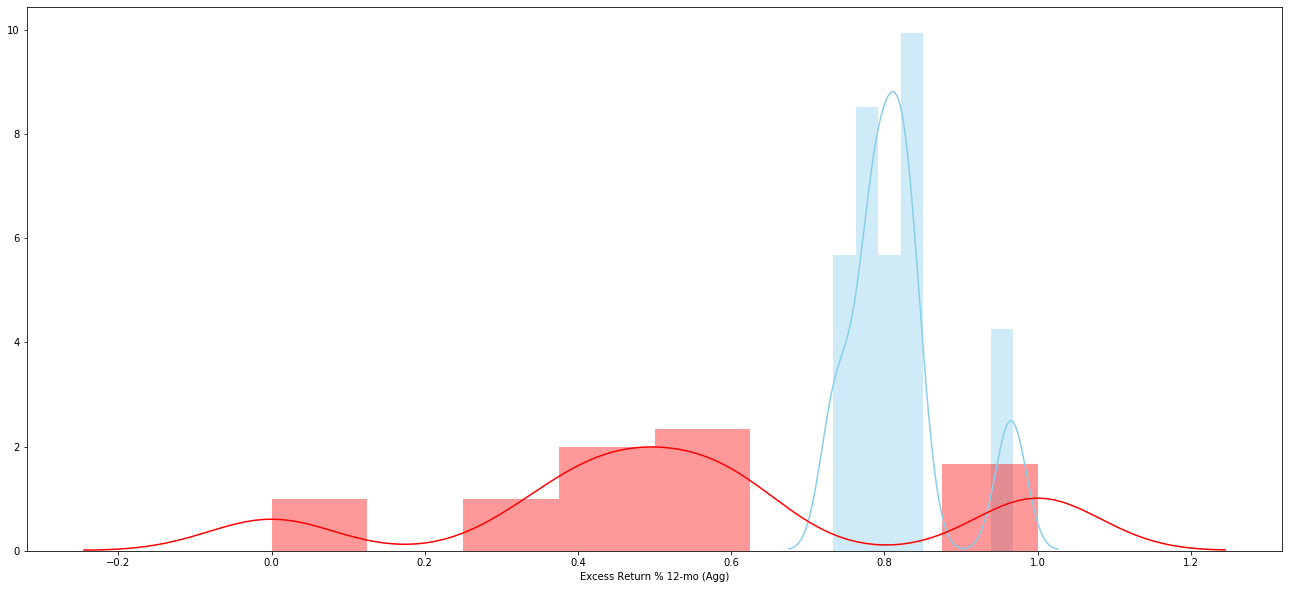

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 24-mo (Treasury)  24.0  0.563046  0.279318  0.057016   
 2                          combined  48.0  0.689997  0.238214  0.034383   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.445100  0.680992  
 2   0.620827  0.759167  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.2539
 1                              Degrees of freedom =   46.0000
 2                                               t =    4.3352
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.2515
 7                                       Hedge's g =    1.2309
 8                    

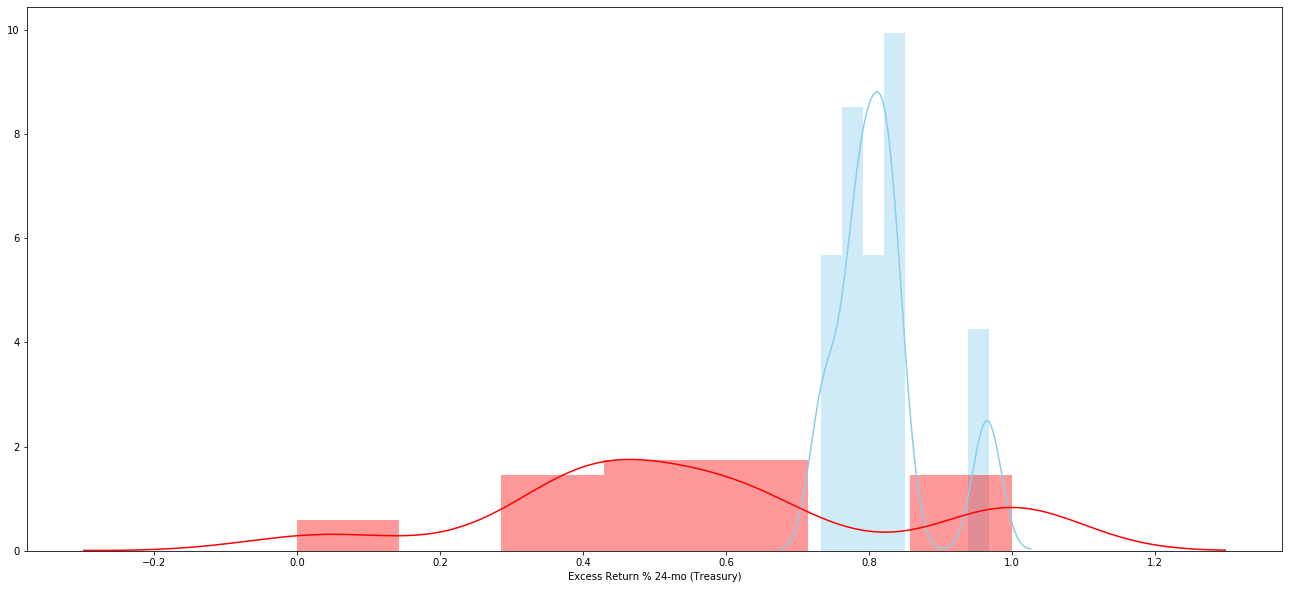

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  24.0  0.816948  0.065619  0.013394   0.789239   
 1  Excess Return % 24-mo (Agg)  24.0  0.516295  0.281473  0.057455   0.397440   
 2                     combined  48.0  0.666622  0.252896  0.036502   0.593188   
 
    Interval  
 0  0.844657  
 1  0.635150  
 2  0.740055  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.3007
 1                              Degrees of freedom =   46.0000
 2                                               t =    5.0962
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.4711
 7                                       Hedge's g =    1.4470
 8                                   Glass

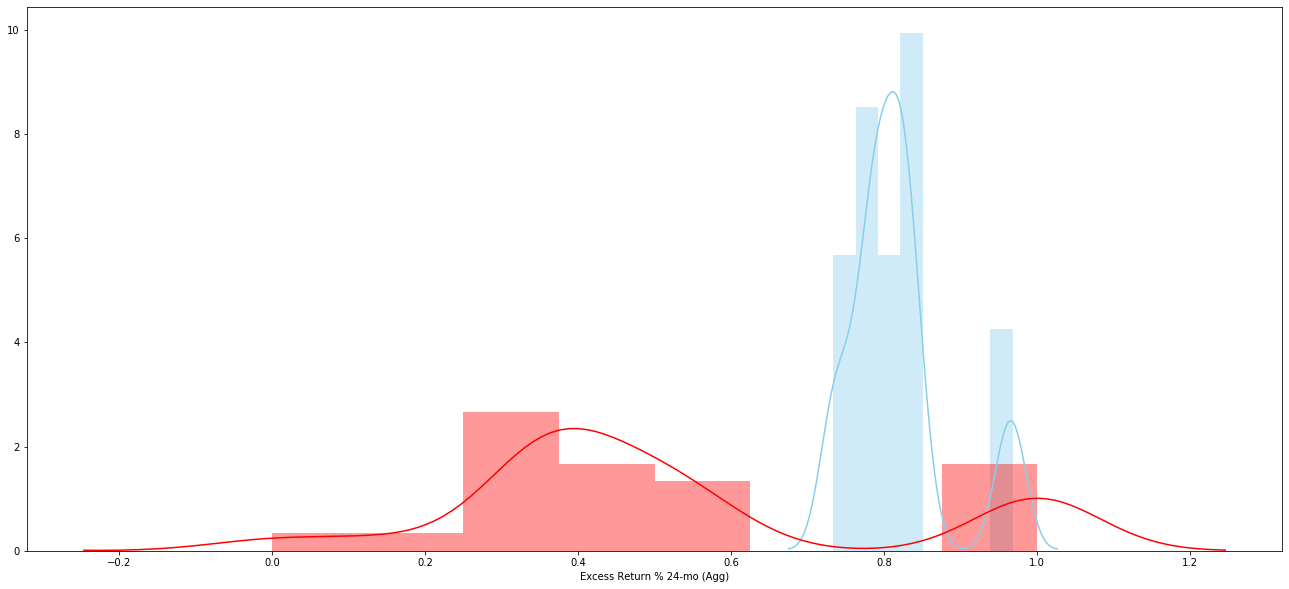

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 36-mo (Treasury)  24.0  0.555396  0.213785  0.043639   
 2                          combined  48.0  0.686172  0.204791  0.029559   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.465122  0.645669  
 2   0.626707  0.745637  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.2616
 1                              Degrees of freedom =   46.0000
 2                                               t =    5.7298
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.6540
 7                                       Hedge's g =    1.6269
 8                    

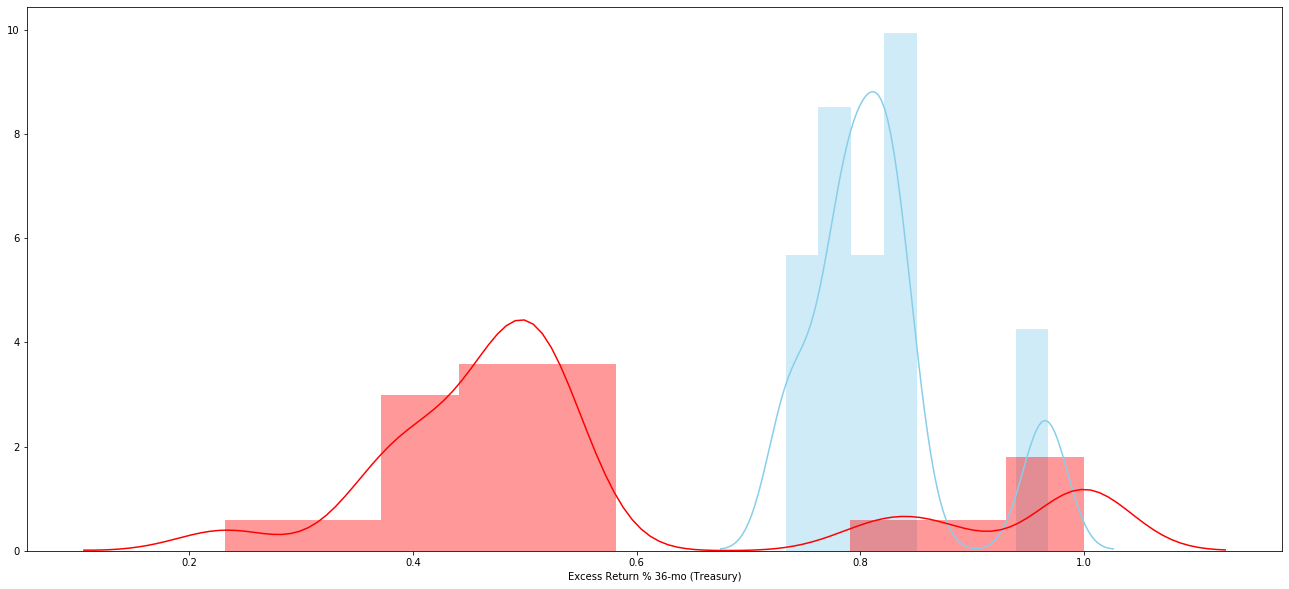

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  24.0  0.816948  0.065619  0.013394   0.789239   
 1  Excess Return % 36-mo (Agg)  24.0  0.534963  0.220722  0.045055   0.441760   
 2                     combined  48.0  0.675955  0.215058  0.031041   0.613509   
 
    Interval  
 0  0.844657  
 1  0.628166  
 2  0.738402  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.2820
 1                              Degrees of freedom =   46.0000
 2                                               t =    5.9992
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.7318
 7                                       Hedge's g =    1.7034
 8                                   Glass

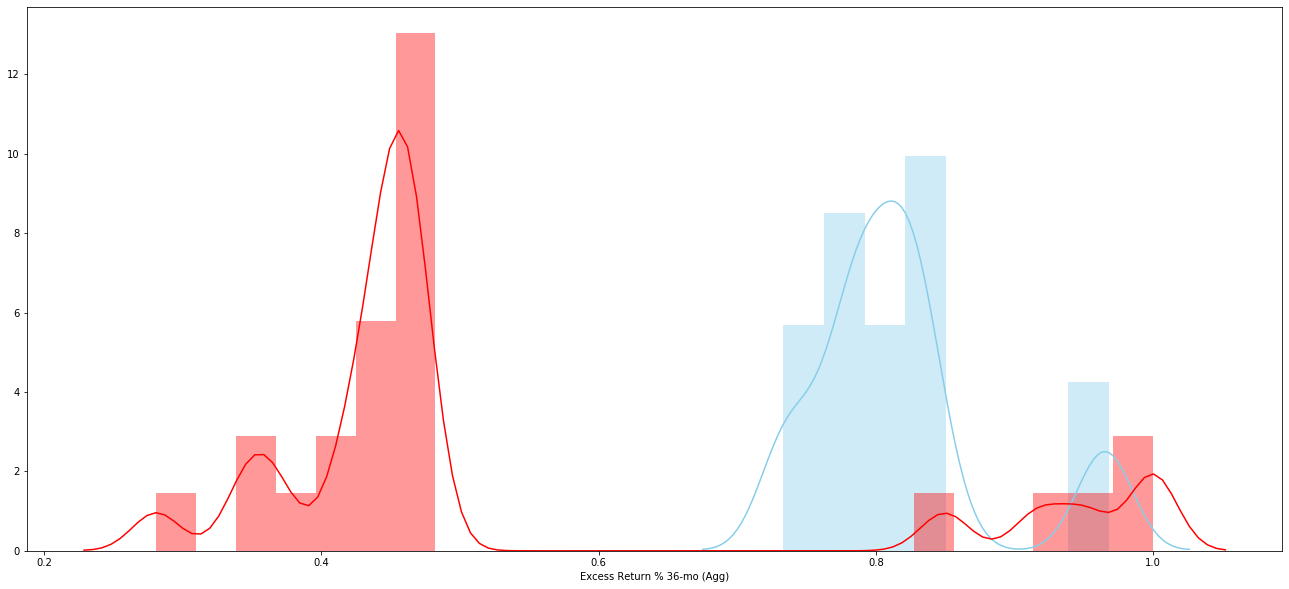

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_FRPS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.499596,0.497619,0.498871,0.486959,0.491705,0.485184,0.488772,0.494764,0.495848,0.487819,0.497761,0.473469,0.482113,0.462641,0.461482,2.55914
std,0.199647,0.223015,0.227708,0.233621,0.234617,0.232990,0.235452,0.231428,0.236072,0.225139,0.229379,0.231109,0.227496,0.227934,0.220252,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.371684,0.374153,0.374529,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.515250,0.507964,0.511728,0.514152,0.507158,0.507324,0.513215,0.510664,0.510860,0.502246,0.500336,0.479800,0.491677,0.482190,0.470409,3.00000
75%,0.623067,0.623599,0.623407,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 3-mo (Treasury)  278.0  0.486959  0.233621  0.014012   
 2                         combined  302.0  0.513183  0.241968  0.013924   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.459376  0.514541  
 2   0.485783  0.540583  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.3300
 1                              Degrees of freedom =   300.0000
 2                                               t =     6.8868
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4652
 7                                       Hedge's g =     1.4615
 8           

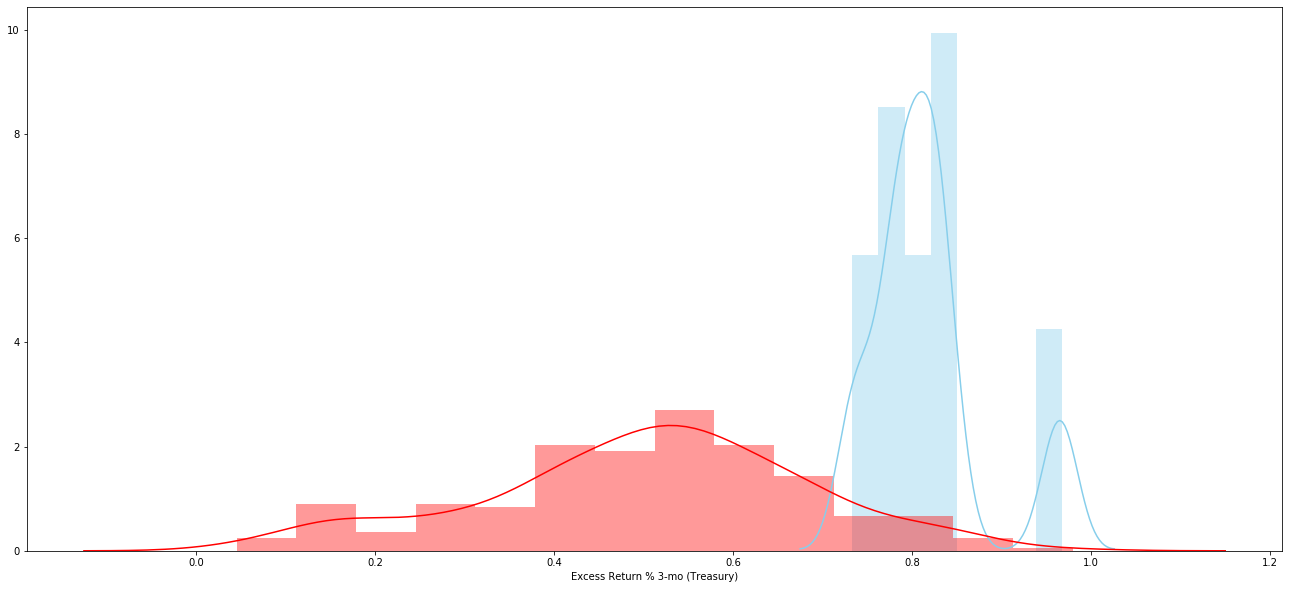

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   24.0  0.816948  0.065619  0.013394   0.789239   
 1  Excess Return % 3-mo (Agg)  278.0  0.491705  0.234617  0.014071   0.464004   
 2                    combined  302.0  0.517552  0.242383  0.013948   0.490105   
 
    Interval  
 0  0.844657  
 1  0.519405  
 2  0.544999  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.3252
 1                             Degrees of freedom =   300.0000
 2                                              t =     6.7591
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.4380
 7                                      Hedge's g =     1.4344
 8                                  Glass'

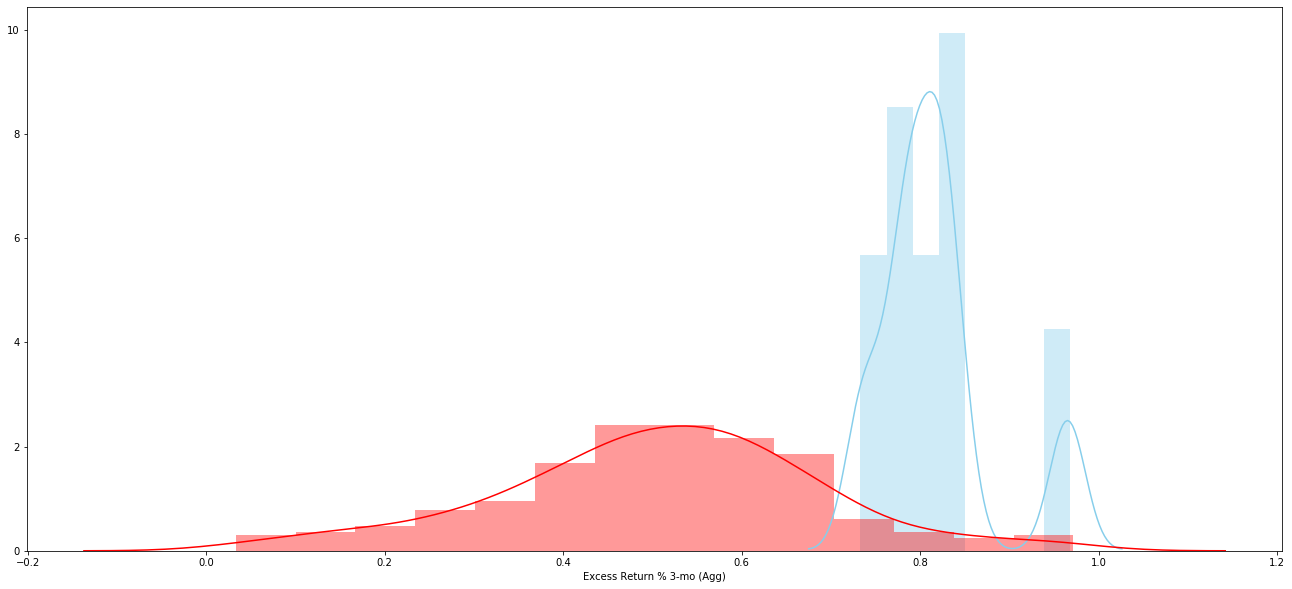

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 6-mo (Treasury)  275.0  0.485184  0.232990  0.014050   
 2                         combined  299.0  0.511814  0.241656  0.013975   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.457525  0.512843  
 2   0.484311  0.539317  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.3318
 1                              Degrees of freedom =   297.0000
 2                                               t =     6.9421
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4776
 7                                       Hedge's g =     1.4739
 8           

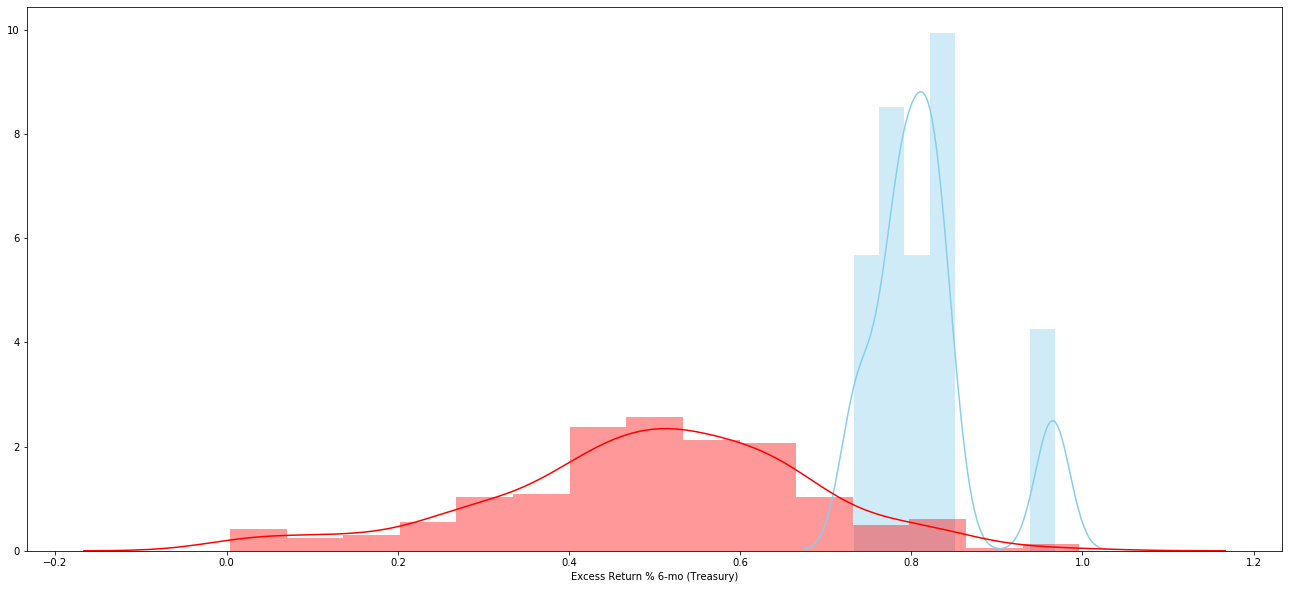

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   24.0  0.816948  0.065619  0.013394   0.789239   
 1  Excess Return % 6-mo (Agg)  275.0  0.488772  0.235452  0.014198   0.460820   
 2                    combined  299.0  0.515114  0.243481  0.014081   0.487403   
 
    Interval  
 0  0.844657  
 1  0.516723  
 2  0.542824  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.3282
 1                             Degrees of freedom =   297.0000
 2                                              t =     6.7957
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.4464
 7                                      Hedge's g =     1.4428
 8                                  Glass'

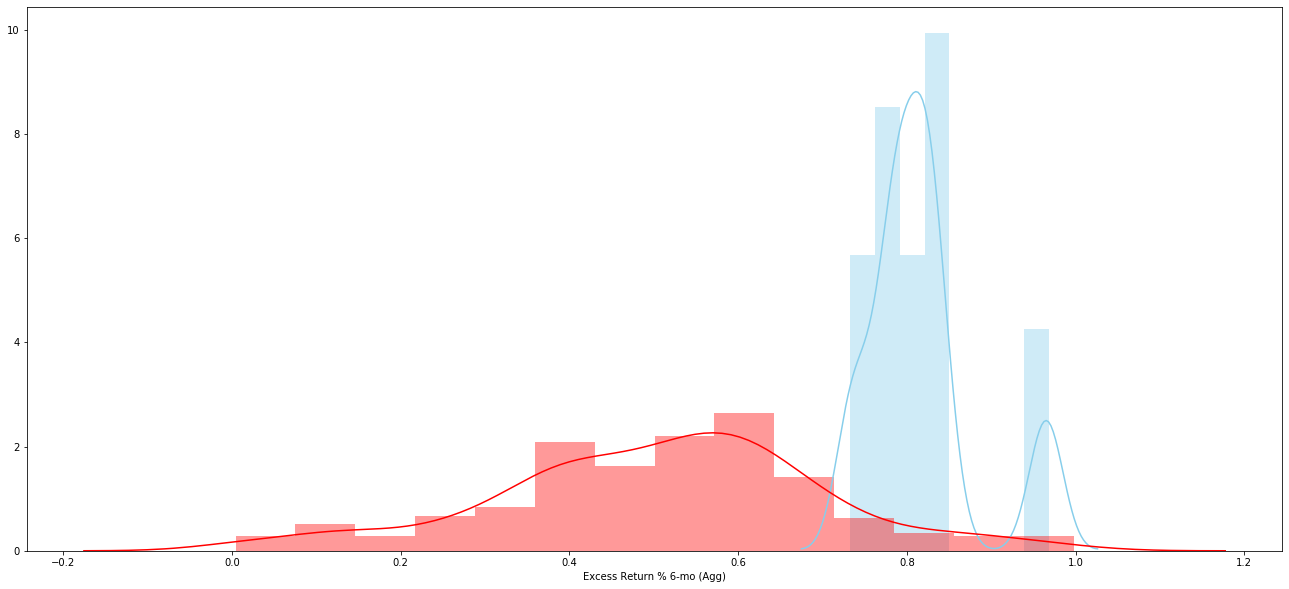

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 9-mo (Treasury)  272.0  0.494764  0.231428  0.014032   
 2                         combined  296.0  0.520887  0.239369  0.013913   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.467138  0.522390  
 2   0.493506  0.548269  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.3222
 1                              Degrees of freedom =   294.0000
 2                                               t =     6.7865
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4451
 7                                       Hedge's g =     1.4414
 8           

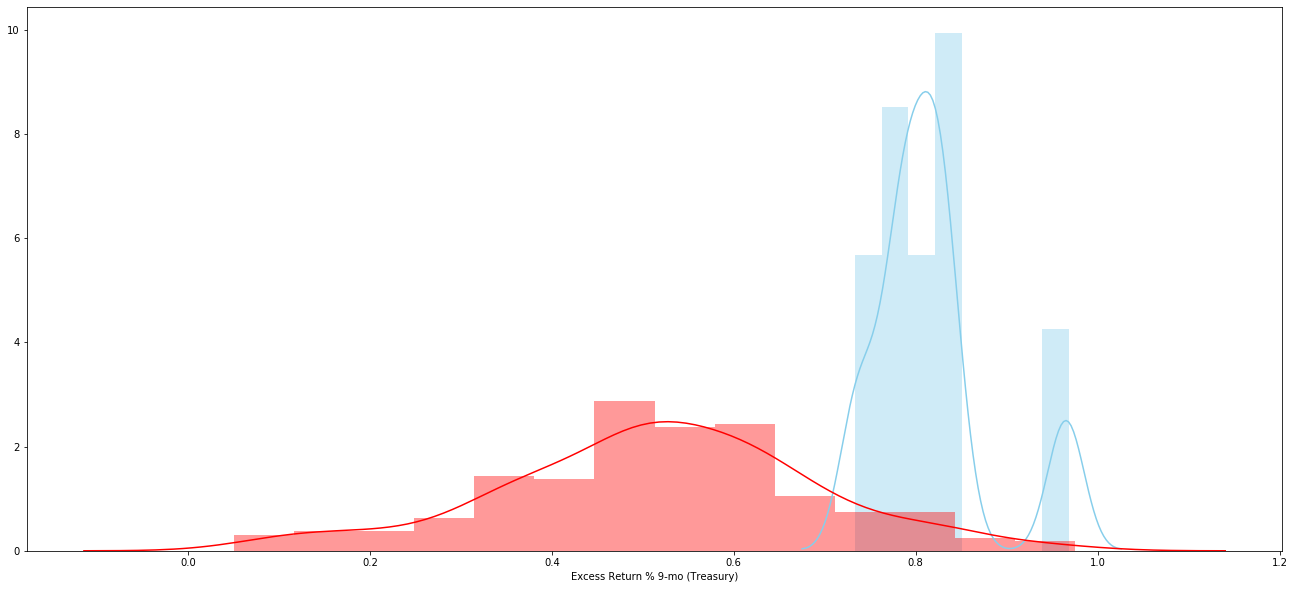

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   24.0  0.816948  0.065619  0.013394   0.789239   
 1  Excess Return % 9-mo (Agg)  272.0  0.495848  0.236072  0.014314   0.467668   
 2                    combined  296.0  0.521883  0.243392  0.014147   0.494042   
 
    Interval  
 0  0.844657  
 1  0.524029  
 2  0.549725  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.3211
 1                             Degrees of freedom =   294.0000
 2                                              t =     6.6315
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.4121
 7                                      Hedge's g =     1.4085
 8                                  Glass'

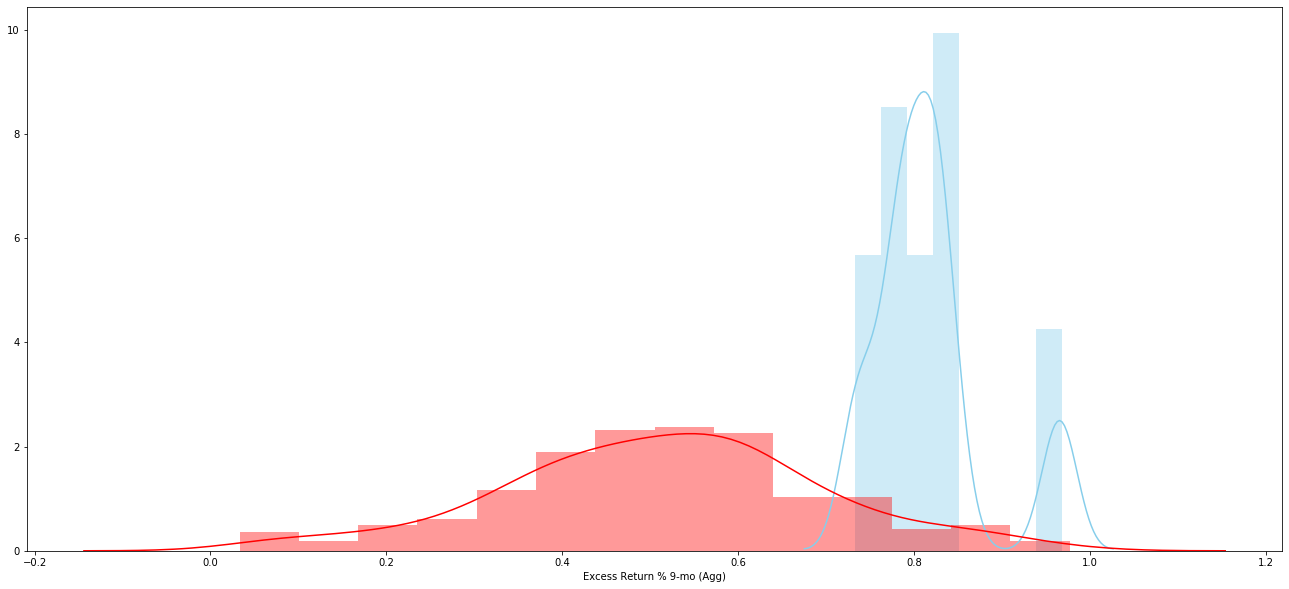

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 12-mo (Treasury)  269.0  0.487819  0.225139  0.013727   
 2                          combined  293.0  0.514779  0.234595  0.013705   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.460793  0.514846  
 2   0.487805  0.541752  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.3291
 1                              Degrees of freedom =   291.0000
 2                                               t =     7.1247
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5178
 7                                       Hedge's g =     1.5139
 8       

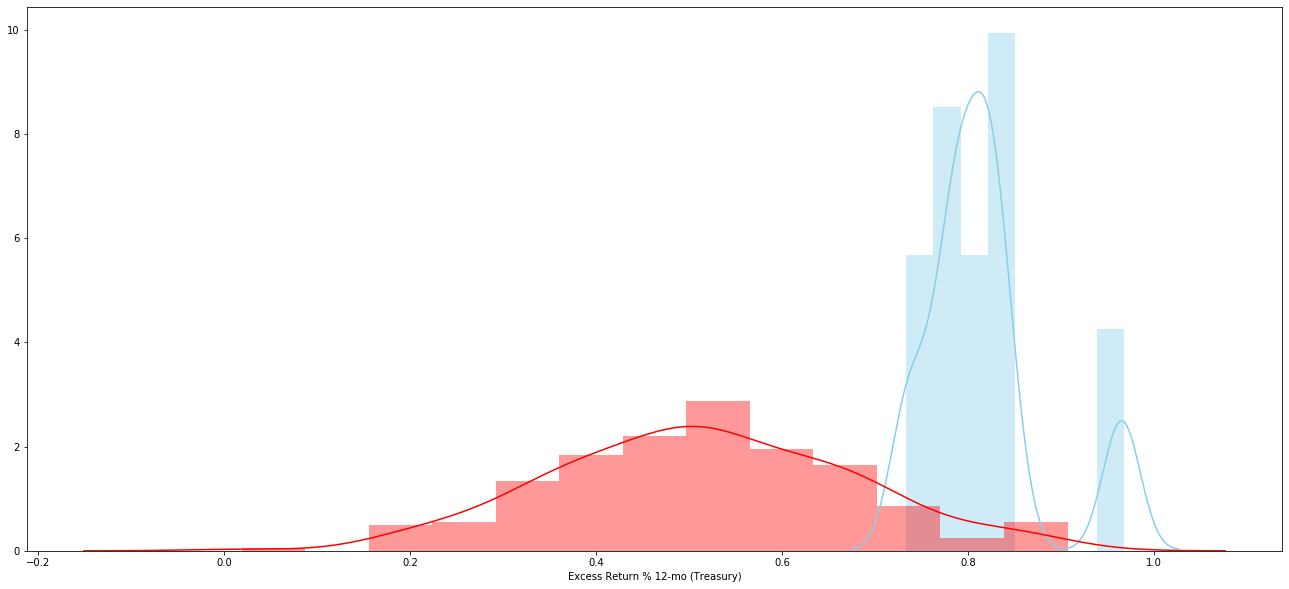

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 12-mo (Agg)  269.0  0.497761  0.229379  0.013985   
 2                     combined  293.0  0.523906  0.237313  0.013864   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.470226  0.525297  
 2   0.496620  0.551192  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.3192
 1                              Degrees of freedom =   291.0000
 2                                               t =     6.7826
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4449
 7                                       Hedge's g =     1.4412
 8                           

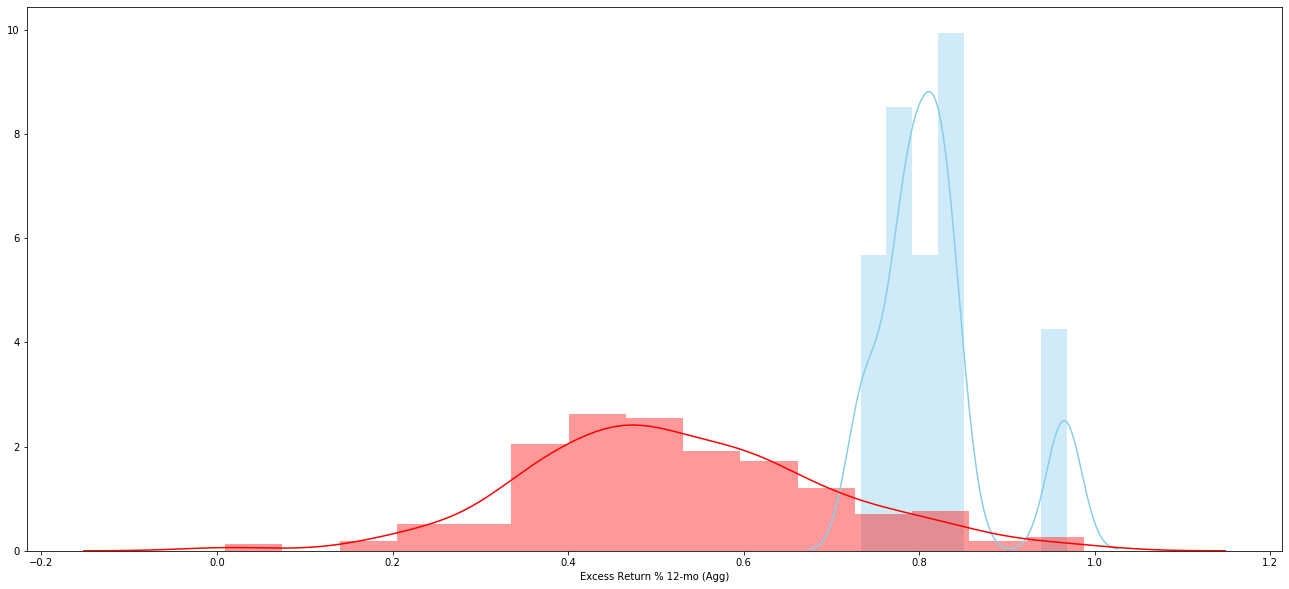

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 24-mo (Treasury)  257.0  0.473469  0.231109  0.014416   
 2                          combined  281.0  0.502806  0.241735  0.014421   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.445080  0.501859  
 2   0.474419  0.531192  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.3435
 1                              Degrees of freedom =   279.0000
 2                                               t =     7.2430
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5460
 7                                       Hedge's g =     1.5418
 8       

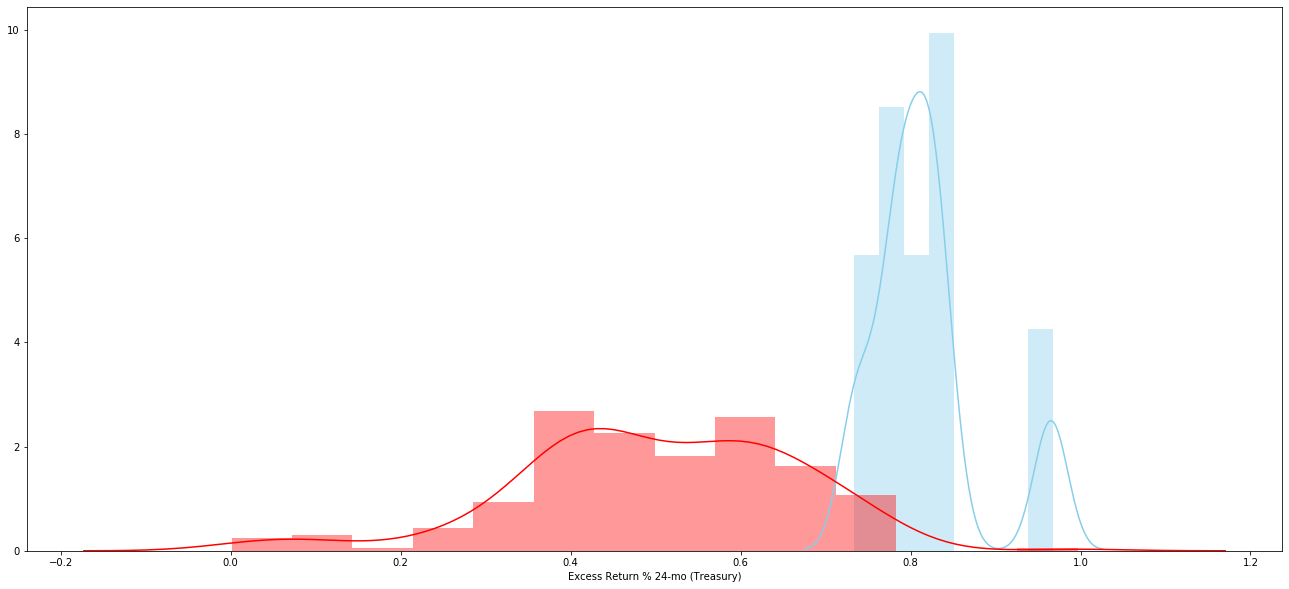

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 24-mo (Agg)  257.0  0.482113  0.227496  0.014191   
 2                     combined  281.0  0.510711  0.237615  0.014175   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.454167  0.510059  
 2   0.482808  0.538614  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.3348
 1                              Degrees of freedom =   279.0000
 2                                               t =     7.1720
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5308
 7                                       Hedge's g =     1.5267
 8                           

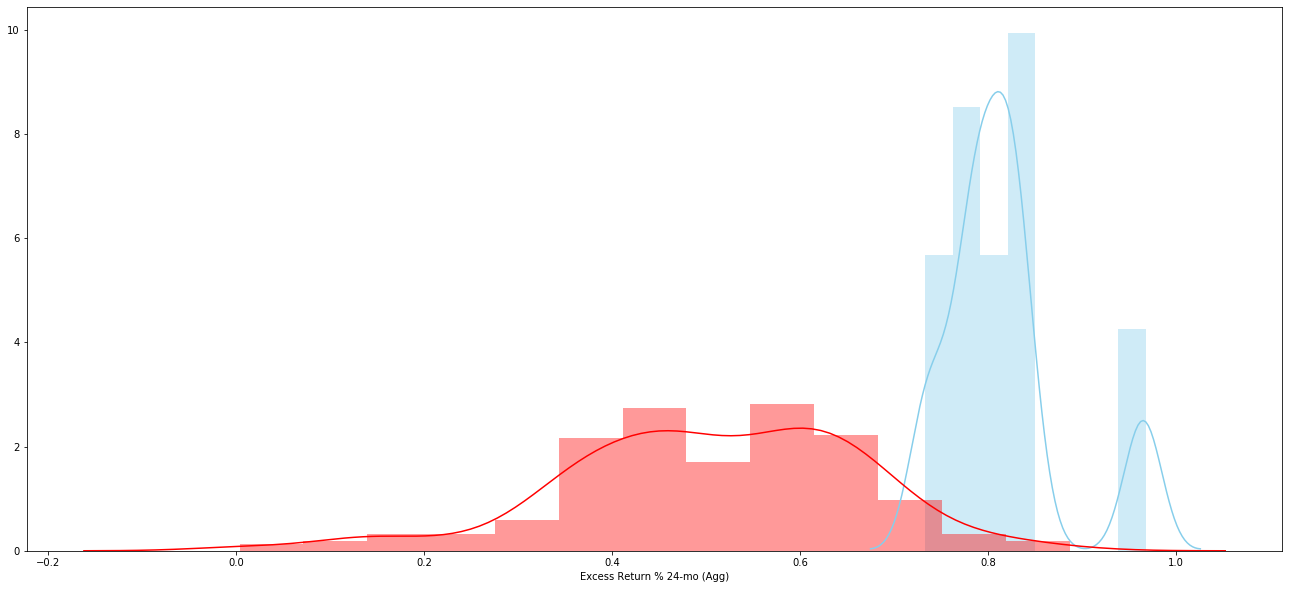

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 36-mo (Treasury)  245.0  0.462641  0.227934  0.014562   
 2                          combined  269.0  0.494252  0.240644  0.014672   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.433957  0.491324  
 2   0.465364  0.523139  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.3543
 1                              Degrees of freedom =   267.0000
 2                                               t =     7.5728
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.6197
 7                                       Hedge's g =     1.6152
 8       

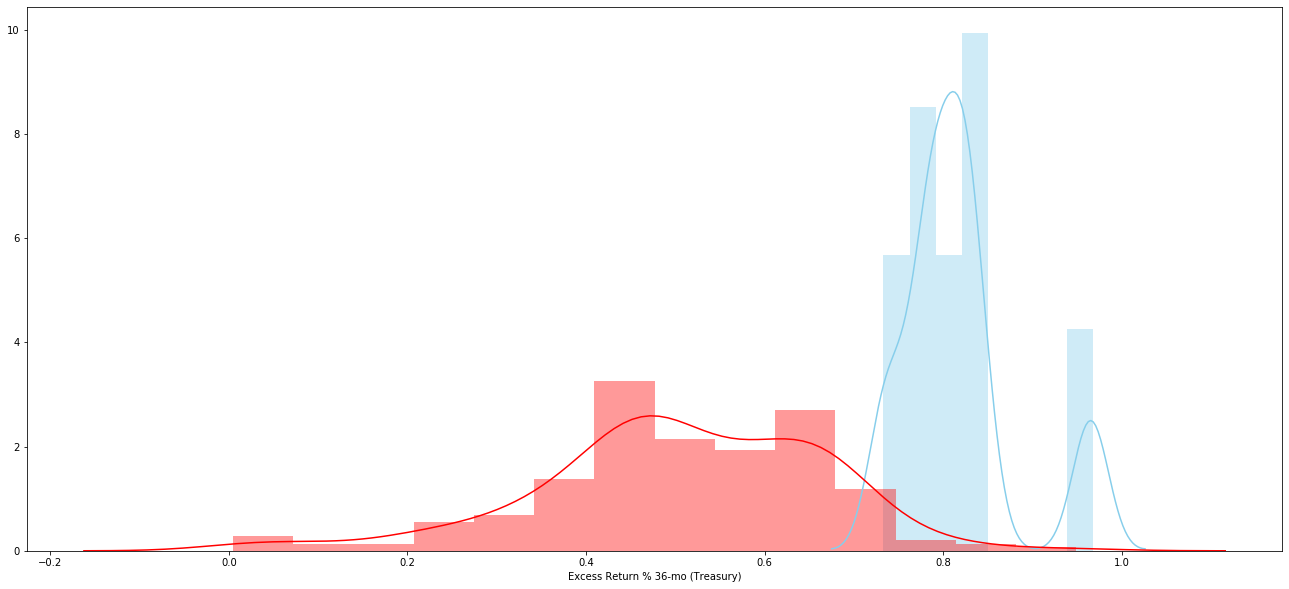

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   24.0  0.816948  0.065619  0.013394   
 1  Excess Return % 36-mo (Agg)  245.0  0.461482  0.220252  0.014071   
 2                     combined  269.0  0.493196  0.234184  0.014278   
 
    95% Conf.  Interval  
 0   0.789239  0.844657  
 1   0.433765  0.489199  
 2   0.465084  0.521308  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.3555
 1                              Degrees of freedom =   267.0000
 2                                               t =     7.8604
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.6812
 7                                       Hedge's g =     1.6765
 8                           

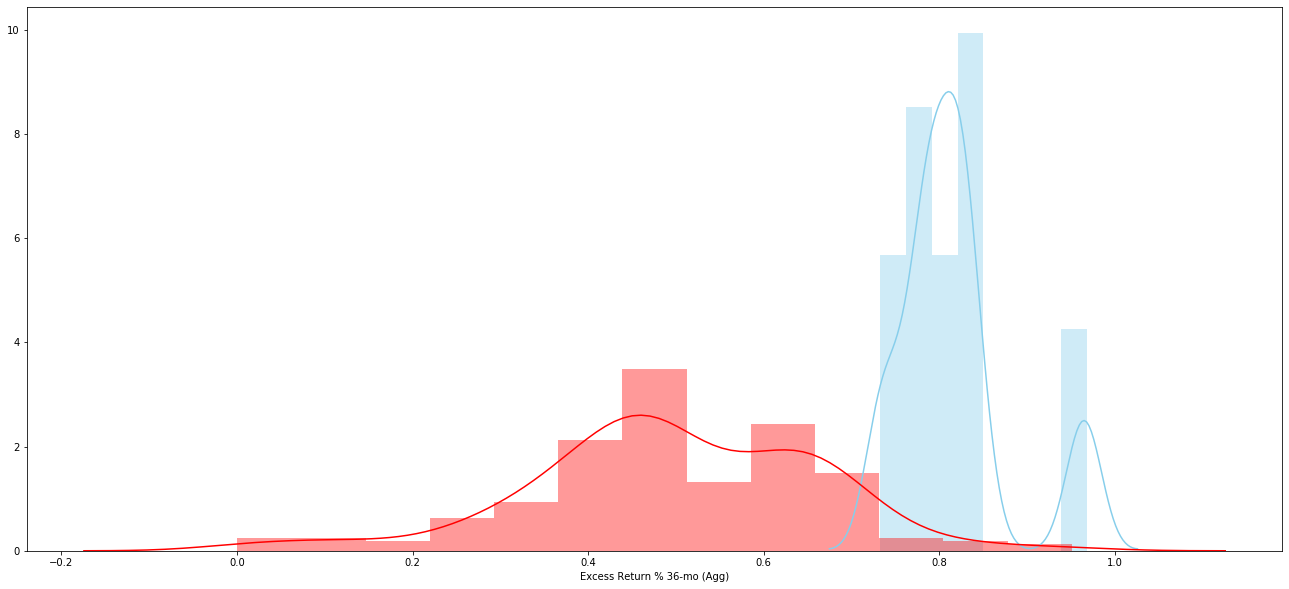

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")